In [2]:
import os
os.listdir(r'/content/drive/MyDrive/lfw_funneled')
dir=r''

import numpy as np
import cv2
dir=r'/content/drive/MyDrive/lfw_funneled/'
cnt=0
for sub in os.listdir(dir):
  if os.path.isdir(dir+sub):
    cnt+=len(os.listdir(dir+sub))
print(cnt)

import numpy as np
data=np.zeros((887,62500))
lab=[]
filc=-1
def vec(adr):
  ax=cv2.imread(adr,0)
  ax=np.resize(ax,(1,62500))
  return ax
for sub in os.listdir(dir):
  if os.path.isdir(dir+sub):
    filc+=1
    for i,j in enumerate(os.listdir(dir+sub)):
      lab.append(filc)
      k=dir+sub+"/"+j
      data[i,:]=vec(k)    
import scipy.linalg as li
print(data.shape)


887
(887, 62500)


In [5]:
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre
das=pre.StandardScaler().fit_transform(data)

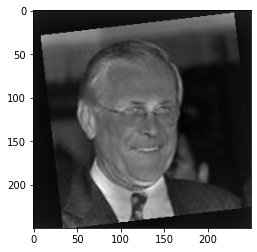

In [6]:
import matplotlib.pyplot as plt
ax2=np.resize(das[2,:],(250,250))
plt.imshow(ax2,cmap='gray')
plt.show()

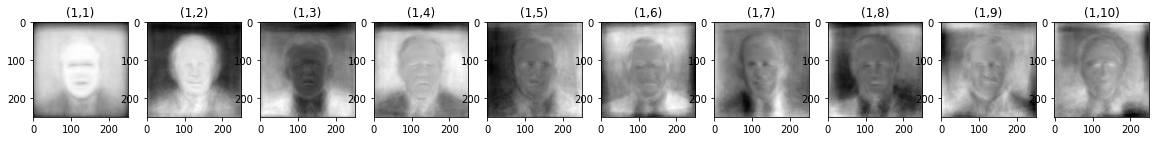

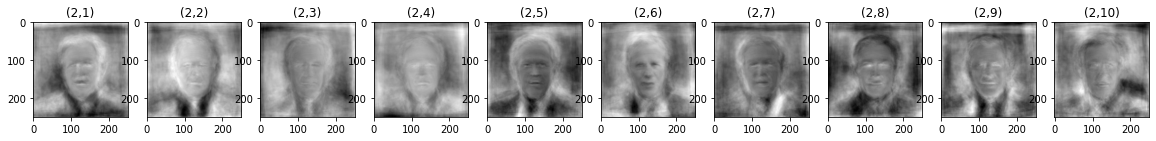

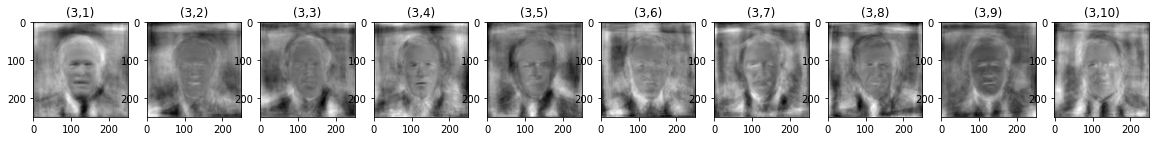

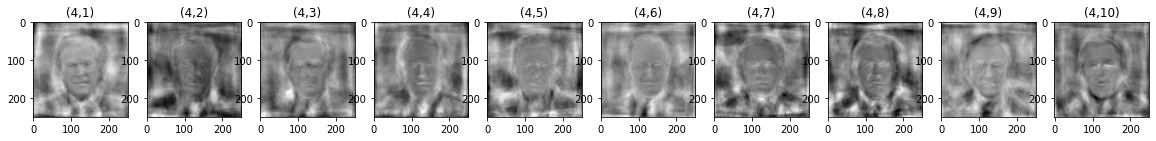

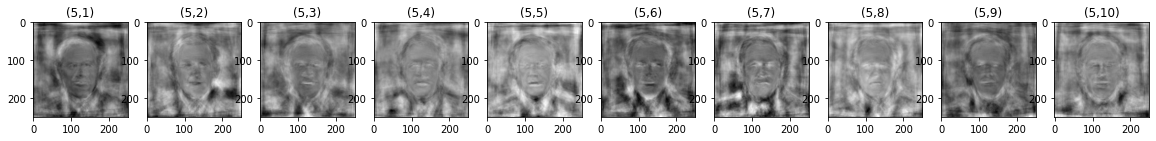

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
das1=pca.fit(das)
for i in range(50):
  fig=plt.figure(i/10,figsize=(20,20))
  j=i%10
  pax=np.resize(das1.components_[i,:],(250,250))
  ax=fig.add_subplot(1,10,j+1)
  ax.imshow(pax,cmap='gray')
  tit="({},{})".format(int(i/10+1),j+1)
  ax.set_title(tit)
plt.show()


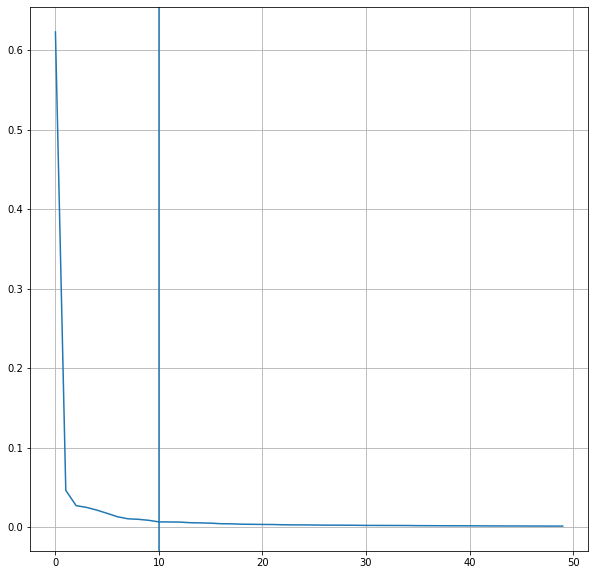

In [34]:
t=das1.explained_variance_ratio_
plt.figure(figsize=(10,10))
plt.axvline(x=10,ymin=0,ymax=1)
plt.grid()
plt.plot(t)
plt.show()

In [58]:
import seaborn as sns
import pandas as pd
import plotly.express as px
pca1=PCA(n_components=2)
das2=pca1.fit_transform(das)
lab1=np.array(lab)
lab1=lab1[:,np.newaxis]
print(lab1.shape,das2.shape)
das3=np.hstack((das2,lab1))
df=pd.DataFrame(das3,columns=['dim1','dim2','lebel'])
df['lebel']=df['lebel'].astype(str)
print(df.head(5))
fig1=px.scatter(df,x='dim1',y='dim2',color='lebel',hover_data=['lebel'],labels=[0,1,2,3])
fig1.update_traces(showlegend=True)
fig1.show()


(887, 1) (887, 2)
         dim1        dim2 lebel
0  174.523320   52.992912   0.0
1   59.647279  116.918638   0.0
2   79.483990  106.921588   0.0
3  349.252612 -144.258990   0.0
4  123.020206   45.480757   0.0


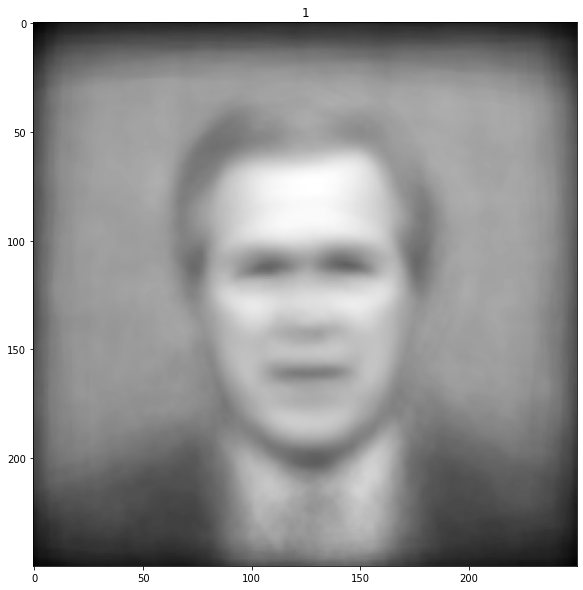

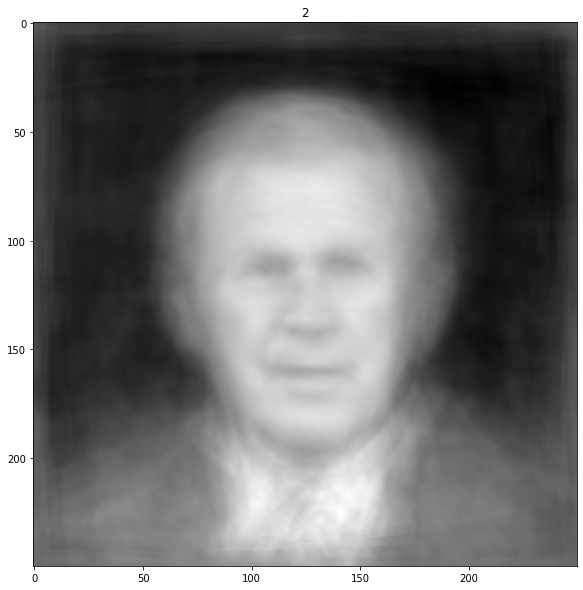

In [63]:
comp=pca1.fit(data)
for i in range(2):
  fig=plt.figure(i,figsize=(10,10))
  k=np.resize(comp.components_[i,:],(250,250))
  plt.imshow(k,cmap='gray')
  plt.title(i+1)
plt.show()

In [70]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,init='pca',random_state=0,perplexity=20,n_iter=2000)
ts1=tsne.fit_transform(das)
das4=np.hstack((ts1,lab1))
df=pd.DataFrame(das4,columns=['dim1','dim2','lebel'])
df['lebel']=df['lebel'].astype(str)
print(df.head(5))
fig1=px.scatter(df,x='dim1',y='dim2',color='lebel',hover_data=['lebel'],labels=[0,1,2,3])
fig1.update_traces(showlegend=True)
fig1.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



         dim1       dim2 lebel
0  181.324341  34.124043   0.0
1  162.582275  75.467575   0.0
2  167.423843  94.664597   0.0
3  288.722321 -53.478821   0.0
4  161.198883  47.337696   0.0
